### Q1. What is Gradient Boosting Regression?

Gradient Boosting Regression, often referred to simply as Gradient Boosting, is a powerful machine learning technique used for regression tasks. 
It belongs to the family of ensemble learning methods, where multiple models are combined to create a stronger, more accurate predictive model.
Gradient Boosting is particularly effective in situations where you need to predict continuous numeric values, making it suitable for regression 
problems.

Here's how Gradient Boosting Regression works:

* #### Initialization:
Gradient Boosting begins by creating a simple regression model as its initial approximation to the target variable. This initial model is usually a constant value, such as the mean of the target values for all training examples.

* #### Residual Calculation:
The algorithm calculates the residuals (the differences between the actual target values and the predictions made by the initial model) for each training example.

* #### Fit a Weak Learner: 
In each iteration, Gradient Boosting fits a weak learner (typically a decision tree of limited depth, often referred to as a "stump") to the residuals. The goal is to find a model that predicts the residuals as accurately as possible.

* #### Update Predictions: 
The predictions from the weak learner are added to the current model's predictions. The goal is to improve the model's predictions by reducing the error in the residuals. This is done by applying a scaling factor (learning rate, typically a small value) to the predictions from the weak learner before adding them to the current model.

* #### Repeat:
Steps 3 and 4 are repeated for a predefined number of iterations (controlled by the hyperparameter "n_estimators") or until a certain performance criterion is met.

* #### Final Prediction: 
The final prediction is the sum of the initial model's prediction and the predictions from all the weak learners. This ensemble of weak learners, with their scaled predictions, collectively forms a strong predictive model.

### Key characteristics and benefits of Gradient Boosting Regression include:

* #### Sequential Learning: 
The model is built sequentially, with each new weak learner focusing on correcting the errors made by the previous ones.

* #### Flexibility: 
Gradient Boosting can handle complex relationships in the data and can approximate both linear and nonlinear functions.

* #### Robustness: 
It is robust to outliers since it can gradually reduce their impact through the residual calculation and fitting process.

* #### Regularization: 
Gradient Boosting can incorporate regularization techniques to prevent overfitting, such as limiting the depth of the decision trees and adjusting the learning rate.

* #### High Predictive Accuracy:
Gradient Boosting often achieves high predictive accuracy and is a popular choice for regression tasks, especially when combined with careful hyperparameter tuning.

* #### Popular Implementations: 
Some well-known libraries that provide implementations of Gradient Boosting for regression tasks include Scikit-Learn's 
GradientBoostingRegressor, XGBoost, LightGBM, and CatBoost.

Gradient Boosting is widely used in various applications, including finance, healthcare, and natural language processing, where accurate regression models are essential for making predictions based on continuous numerical data.

### Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a simple regression problem as an example and train the model on a small dataset. Evaluate the model's performance using metrics such as mean squared error and R-squared.

Mean Squared Error: 0.0026
R-squared: 0.9949


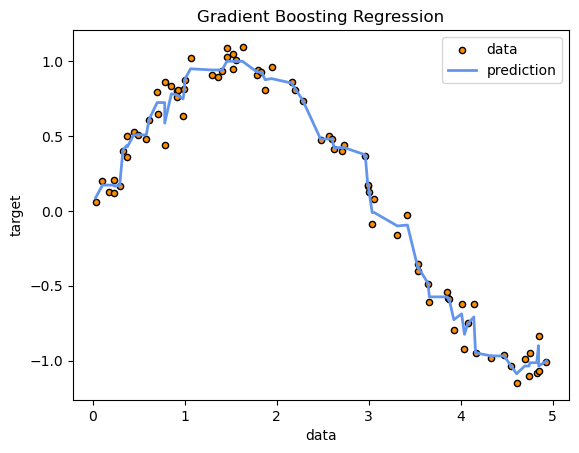

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1

# Gradient Boosting parameters
n_estimators = 100
learning_rate = 0.1

# Initialize the ensemble's prediction with the mean of the target values
initial_prediction = np.mean(y)
predictions = np.full_like(y, initial_prediction)

# Gradient Boosting
for _ in range(n_estimators):
    # Calculate residuals
    residuals = y - predictions
    
    # Fit a decision tree regressor to the residuals
    weak_learner = DecisionTreeRegressor(max_depth=2)
    weak_learner.fit(X, residuals)
    
    # Make predictions with the weak learner
    weak_predictions = weak_learner.predict(X)
    
    # Update the ensemble's predictions
    predictions += learning_rate * weak_predictions

# Evaluate the model
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X, predictions, color="cornflowerblue", linewidth=2, label="prediction")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Gradient Boosting Regression")
plt.legend()
plt.show()


In [ ]:
In this example:

    We generate a synthetic dataset with a simple sinusoidal relationship and add some random noise.

    We initialize the ensemble's prediction with the mean of the target values.

    We iterate through the specified number of estimators (weak learners), each time fitting a decision tree regressor to the residuals (errors) 
    of the previous predictions.

    We update the ensemble's predictions by scaling the predictions of the weak learner with a learning rate.

    Finally, we evaluate the model using mean squared error (MSE) and R-squared (R²) and plot the results.

Keep in mind that this is a basic and simplified example for educational purposes. In practice, gradient boosting libraries like Scikit-Learn or
XGBoost provide more efficient and optimized implementations with additional features and hyperparameter tuning options.

### Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to optimise the performance of the model. Use grid search or random search to find the best hyperparameters

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split

# Generate synthetic dataset
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 2, 3]
}

# Initialize the Gradient Boosting Regressor
gb = GradientBoostingRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters
best_gb = GradientBoostingRegressor(**best_params)
best_gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_gb.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print(f"Mean Squared Error (Test): {mse:.4f}")
print(f"R-squared (Test): {r2:.4f}")


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 100}
Mean Squared Error (Test): 0.0122
R-squared (Test): 0.9733


In [ ]:
In this code:

We split the dataset into training and testing sets.

We define a parameter grid that includes different values for learning_rate, n_estimators, and max_depth.

We use Scikit-Learn's GridSearchCV to perform a grid search with cross-validation (cv=5) to find the best hyperparameters based on negative mean 
squared error (to maximize R-squared).

We fit the final model with the best hyperparameters and evaluate it on the test set.

You can adjust the param_grid to include more hyperparameters or different values to further optimize the model. Additionally, you can consider 
using random search (RandomizedSearchCV) for a more efficient hyperparameter search, especially when dealing with a large parameter space.

### Q4. What is a weak learner in Gradient Boosting?

In the context of Gradient Boosting, a "weak learner" refers to a base or individual model that performs slightly better than random guessing but is still relatively simple and has limited predictive power on its own. Weak learners are typically decision trees with shallow depths, often referred to as "stumps," or other simple models like linear regressors.

The concept of using weak learners in ensemble methods like Gradient Boosting is central to the algorithm's success. Gradient Boosting builds an ensemble of these weak learners in a sequential manner to create a strong predictive model. Each weak learner is tasked with capturing some part of the underlying patterns or relationships in the data, and their predictions are combined to improve the overall model's accuracy.


Here are some characteristics of weak learners in Gradient Boosting:

* #### Low Complexity: 
Weak learners are intentionally kept simple to avoid overfitting the training data. For decision trees, this typically means limiting the tree depth to a small value (e.g., 1 or 2 levels), resulting in trees that make simple splits based on a single feature.

* #### Slightly Better than Random: 
While weak learners may not be very accurate on their own, they should perform slightly better than random guessing. In other words, they should have a better-than-chance probability of making correct predictions.

* #### Sequentially Improved: 
In Gradient Boosting, each new weak learner is trained to correct the errors (residuals) made by the ensemble of previous learners. This sequential learning process allows the model to incrementally improve its predictions.

* #### Complementary: 
Weak learners are designed to be complementary to each other. Different weak learners may capture different aspects of the data's complexity. As they are combined, their strengths compensate for each other's weaknesses, leading to a more accurate overall model.

* #### Fast to Train: 
Weak learners should be quick to train, as they are trained iteratively in the boosting process. Simple models like shallow decision trees meet this criterion.


It's important to note that the choice of weak learner and its hyperparameters can impact the performance and behavior of the Gradient Boosting ensemble. Common weak learners include decision stumps, which are single-node decision trees, and linear regressors. The sequential aggregation of these weak learners with carefully adjusted weights and learning rates allows Gradient Boosting to construct highly and robust predictive models for a variety of machine learning tasks.

### Q5. What is the intuition behind the Gradient Boosting algorithm?

The intuition behind the Gradient Boosting algorithm can be summarized as follows:

* #### Sequential Learning:
Gradient Boosting builds an ensemble of weak learners (often decision trees) in a sequential manner. It starts with an initial simple model and then iteratively improves it. Each iteration adds a new weak learner that focuses on the mistakes or residuals made by the ensemble up to that point.

* #### Emphasis on Errors: 
The key idea is to give more attention to the examples that the current ensemble finds difficult to predict correctly. It does this by fitting new weak learners to the errors made by the previous ensemble. This emphasis on errors helps the model gradually correct its mistakes and improve its overall accuracy.

* #### Weighted Voting:
Predictions from each weak learner are combined in a weighted manner. Weak learners that perform better are given more weight in the final prediction, while those that perform worse are given less weight. This weighted voting ensures that the ensemble focuses on the areas where it needs improvement.

* #### Boosting Performance: 
The name "Gradient Boosting" comes from the use of gradients (the direction and magnitude of the errors) to guide the model's updates. By repeatedly fitting weak learners to the negative gradients of the loss function, the model learns to "boost" its performance by moving in the direction of steepest decrease in the loss function.

* #### Complexity Control: 
To prevent overfitting, each weak learner is typically constrained in complexity (e.g., limited tree depth) to ensure that they are indeed weak. This control of complexity is crucial for the model to generalize well to new, unseen data.

* #### Aggregating Weak Models: 
The final prediction is obtained by summing up the predictions from all the weak learners, with each prediction being weighted according to its contribution to the overall performance. This aggregation process creates a strong ensemble model.

* #### Effective for Complex Patterns:
Gradient Boosting is effective in capturing complex relationships and patterns in the data, as it can iteratively refine its predictions to fit the data better.


In summary, the intuition behind Gradient Boosting is that it builds a powerful predictive model by iteratively improving upon the mistakes made by the current ensemble. It focuses on difficult-to-predict examples, combines the predictions of weak learners, and uses gradients to guide its learning process. This approach often results in highly accurate and robust models that excel in a wide range of machine learning tasks.

### Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?

The Gradient Boosting algorithm builds an ensemble of weak learners in a sequential and adaptive manner. The process involves iteratively adding weak learners to the ensemble, each of which focuses on correcting the errors or residuals made by the ensemble up to that point. 
Here's how the Gradient Boosting algorithm builds this ensemble:

#### Initialization:

The process begins with an initial simple model, often set to the mean (or another constant) of the target variable. This initial prediction serves as the starting point for the ensemble.

#### Iterative Process:

The algorithm proceeds through a series of iterations, with each iteration adding a new weak learner to the ensemble.
    
* In each iteration:
     * Calculate the residuals: The residuals are the differences between the actual target values and the predictions made by          the current ensemble.
     * Fit a weak learner to the residuals: The new weak learner is typically a decision tree with limited depth (a "stump" or          small tree) or another simple model. It is trained to predict the residuals based on the input features.
     * Calculate a learning rate: A learning rate (typically a small value between 0 and 1) controls the step size at which the        new weak learner's predictions are added to the ensemble. It allows for finer adjustments and regularization.
     * Update the ensemble's predictions: The predictions from the new weak learner are scaled by the learning rate and added to        the current ensemble's predictions. This update aims to reduce the errors made by the ensemble, effectively moving closer        to the correct predictions.

#### Stopping Criteria:

The algorithm continues adding weak learners until a predefined stopping criteria are met. Common stopping criteria include reaching a specified number of iterations (n_estimators), achieving a certain level of performance improvement, or minimizing a specific loss function.

#### Final Ensemble:

The final ensemble is the sum of the initial model's prediction and the predictions from all the added weak learners. This ensemble combines the contributions of all the weak learners into a single, strong predictive model.

#### Key Points:

1. Each weak learner is trained to specialize in correcting the errors made by the current ensemble.
2. The learning rate controls the contribution of each weak learner to the ensemble's predictions.
3. The ensemble gradually reduces its prediction errors and improves its overall accuracy as more weak learners are added.
4. Gradient Boosting uses gradients (slopes) of the loss function with respect to the current predictions to guide the training    of each new weak learner. This is why it's called "Gradient" Boosting.
5. By iteratively adding and adjusting weak learners, Gradient Boosting can capture complex relationships in the data and create    a highly accurate predictive model.
6. Gradient Boosting is a type of ensemble learning, and it's often used for both regression and classification tasks. Popular      implementations include Scikit-Learn's GradientBoostingRegressor and GradientBoostingClassifier, as well as other libraries      like XGBoost, LightGBM, and CatBoost.

### Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting algorithm?

Building mathematical intuition for the Gradient Boosting algorithm involves understanding its core components and how they work together to create a powerful ensemble learning method. Here are the key steps and concepts involved in constructing the mathematical intuition behind Gradient Boosting:

#### Decision Trees:

Start with an understanding of decision trees, which are fundamental components of Gradient Boosting. Decision trees are a supervised machine learning technique used for both classification and regression tasks.
Each decision tree represents a set of rules for making predictions based on input features. In regression, the leaf nodes of the tree contain predicted values, and in classification, they contain class labels or probabilities.

#### Ensemble Learning:

Gradient Boosting is an ensemble learning method, which means it combines multiple weak learners (typically decision trees) to create a strong learner.The key idea is to iteratively add decision trees to improve predictive accuracy.

#### Weak Learners (Base Models):

In the context of Gradient Boosting, weak learners are decision trees with limited depth, often referred to as "stumps" or "shallow trees." These trees are too simple to make accurate predictions on their own but can contribute when combined.

#### Residuals:

Gradient Boosting focuses on the errors (residuals) made by the current ensemble of weak learners. Initially, these errors are substantial.The goal is to fit subsequent weak learners to the residuals of the previous ones.

#### Loss Function:

Define a loss function that measures the difference between the actual target values and the predictions made by the current ensemble of trees.Common loss functions include Mean Squared Error (MSE) for regression and log-loss (cross-entropy) for classification.

#### Gradient Descent:

Gradient Boosting uses gradient descent optimization to minimize the loss function. It adjusts the parameters of the weak learners to move in the direction that reduces the loss.
For each iteration, the gradient of the loss function with respect to the current predictions is computed. This gradient provides the information needed to update the ensemble.

#### Learning Rate:

Introduce a learning rate (also called the shrinkage or step size), which controls how much each weak learner contributes to the ensemble.Smaller learning rates result in more gradual adjustments and potentially better generalization.

#### Weighted Sum:

At each iteration, add a weighted version of a new weak learner to the current ensemble.
The weights are determined by the learning rate and the gradient of the loss function. This process reduces the error by a fraction at each step.

#### Stopping Criterion:

Decide when to stop adding weak learners to the ensemble. This can be based on a fixed number of iterations, a predefined level of performance improvement, or early stopping strategies.

#### Final Prediction:

The final prediction is the sum of predictions made by all the weak learners, often weighted by their respective learning rates.
For regression tasks, this sum directly provides the predicted target values. For classification tasks, additional steps may be involved, such as converting scores into class labels or probabilities.


By understanding these steps and concepts, you can develop a solid mathematical intuition for how Gradient Boosting works and how it gradually improves the accuracy of predictions by iteratively fitting weak learners to the residuals of the previous iterations.